# Trasarea curbelor caracteristice ale pompelor centrifuge

### Noţiuni teoretice

1. Ce este o pompa hidraulica? Care sunt diferentele dintre o pompa volumica si una
centrifuga?

2. Definiti succinct urmatorii parametri functionali ai unei turbopompe: debitul, inaltimea de
pompare, puterea utila, puterea absorbita, randamentul.

3. Ce intelegeti prin curbele caracteristice ale unei pompe centrifuge? Care sint cele mai utile
curbe caracteristice din punct de vedere al exploatarii pompei?

4. Prezentati succint modul in care s-a determinat pe cale experimentala randamentul
pompei centrifuge (pentru fiecare marime care intervine in expresia randamentului
precizati modul in care aceasta a fost determinata/masurata)

### Trasarea curbelor caracteristice ale pompelor centrifuge

In celula urmatoare vor fi notate valorile citite in timpul experimentului

In [2]:
# valori citite
turatie=[2500 for i in range(19)]
volum =[0.02 for i in range(19)]
timp =[136,43,28,20,18,17,16,15,12,137,48,28,24,21,18,17,16,15,11]
#h1
sarcinaLaIntrare=[-0.1, -0.1, -0.2, -0.2, -0.3, -0.4, -0.6, -0.7, -1.1, -0.2, -0.4, -0.6, -0.8, -1, -1.3, -1.6, -1.9, -2, -2.1]
#h2
sarcinaLaIesire=[22, 19, 17, 14, 13, 12, 10, 8, 2, 30, 28, 26, 24, 22, 20, 18, 16, 14, 4] 
intensitate=[1.2, 1.3, 1.35, 1.39, 1.44, 1.43, 1.45, 1.47, 1.5, 1.28, 1.39, 1.49, 1.53, 1.55, 1.6, 1.62, 1.64, 1.69, 1.71]
tensiune=[173, 176, 177, 178, 179, 180, 180, 180, 181, 201, 204, 207, 208, 209, 210, 211, 211, 211, 211]
# nr de citiri este calculat automat
nrCitiri = len(turatie)

# constante
p = 1000  # densitatea apei: 1000 kg/m^3
g = 10 # acceleratia gravitationala 10 m/s^2
hd_iesire = 0.017 #metri
hd_intrare = 0.02 #metri


In [85]:
# Import pandas library
import pandas as pd



def calculDebit(deltaV ,deltaT):
    debit = deltaV / deltaT
    return debit
hd = hd_iesire - hd_intrare
def calculInaltime(hd,h1,h2):
    inaltime = hd+h2-h1
    return inaltime
def calculPutereUtila(p,g,q,h):
    putereUtila = p*g*q*h
    return putereUtila
def calculPutereConsumata(tensiune,intensitate):
    putereConsumata = tensiune * intensitate
    return putereConsumata
def calculRandament(p_u, p_c):
    randament = 100 * p_u / p_c
    return randament

debitVolumic =[calculDebit(volum[i], timp[i]) for i in range(nrCitiri)]
inaltimeDePompare =[calculInaltime(hd, sarcinaLaIntrare[i], sarcinaLaIesire[i]) for i in range(nrCitiri)]
putereaUtila =[calculPutereUtila(p, g, debitVolumic[i], inaltimeDePompare[i]) for i in range(nrCitiri)]
putereaConsumata =[calculPutereConsumata(tensiune[i], intensitate[i]) for i in range(nrCitiri)]
randamentul =[calculRandament(putereaUtila[i], putereaConsumata[i]) for i in range(nrCitiri)]

data = {'Turatie': turatie,
        'Volum': volum,
        'Timp': timp,
        'Sarcina la intrare': sarcinaLaIntrare,
        'Sarcina la iesire': sarcinaLaIesire,
        'I': intensitate,
        'U':tensiune,
        'Debit Volumic':debitVolumic,
        'Inaltime de pompare':inaltimeDePompare,
        'Puterea utila':putereaUtila,
        'Puterea consumata':putereaConsumata,
        'Randamentul':randamentul
        
       }
header=[['Mărimi măsurate','Mărimi măsurate','Mărimi măsurate',
         'Mărimi măsurate','Mărimi măsurate','Mărimi măsurate','Mărimi măsurate',
        'Mărimi calculate','Mărimi calculate','Mărimi calculate','Mărimi calculate','Mărimi calculate',],
        ['Turatie','Volum','Timp', 'Sarcina la intrare','Sarcina la iesire','I', 'U', 'Debit Volumic','Inaltime de pompare',
        'Puterea utila', 'Puterea consumata', 'Randamentul'],
       ['[min^-1]','dV [m^3}','dt [s]', 'h1 [m]','h2 [m]','[A]', '[V]', 'Q [m^3/s]','H [m]',
        'Pu [W]', 'P0 [W]', 'n [%]']]
 
# Create DataFrame
df = pd.DataFrame(data)
df.columns=header
s = df.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props":"background-color:#deebf7; color:black; border:2px solid black;"
                            },                            

                                {
                                "selector":"thead .col7",
                                "props":"background-color:#e2efd9; color:black; "
                            },                                {
                                "selector":"thead .col8",
                                "props":"background-color:#e2efd9; color:black; "
                            },                                {
                                "selector":"thead .col9",
                                "props":"background-color:#e2efd9; color:black; "
                            },                                {
                                "selector":"thead .col10",
                                "props":"background-color:#e2efd9; color:black; "
                            },                                {
                                "selector":"thead .col11",
                                "props":"background-color:#e2efd9; color:black; "
                            },

                        ])
s

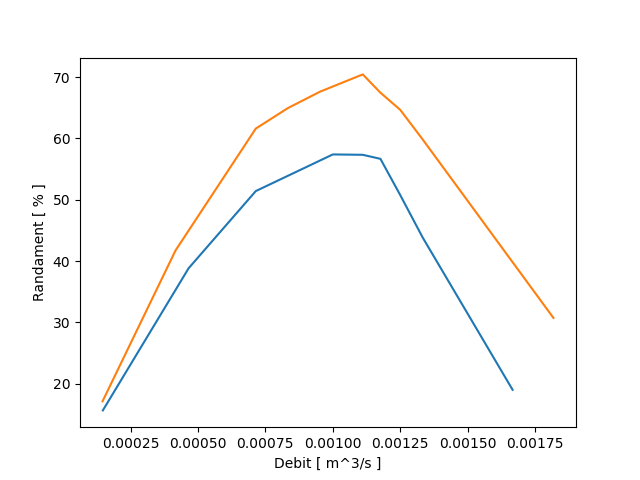

In [72]:
import matplotlib.pyplot as plt
plt.plot(debitVolumic[0:9], randamentul[0:9])
plt.plot(debitVolumic[9:19], randamentul[9:19])
plt.xlabel('Debit [ m^3/s ]')
plt.ylabel('Randament [ % ]')
plt.show()


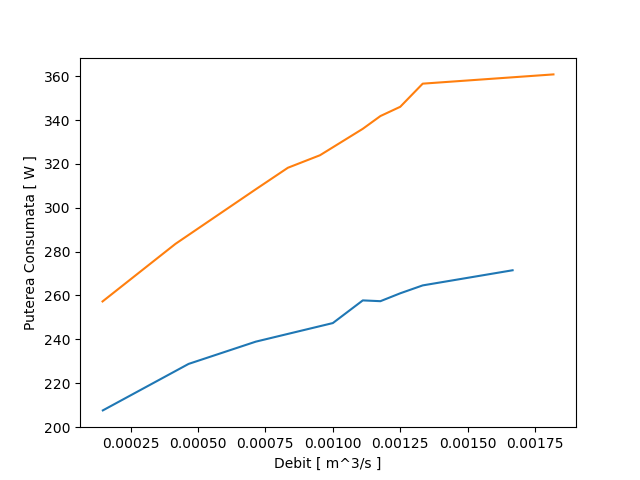

In [37]:
plt.plot(debitVolumic[0:9], putereaConsumata[0:9])
plt.plot(debitVolumic[9:19], putereaConsumata[9:19])
plt.xlabel('Debit [ m^3/s ]')
plt.ylabel('Puterea Consumata [ W ]')
plt.show()

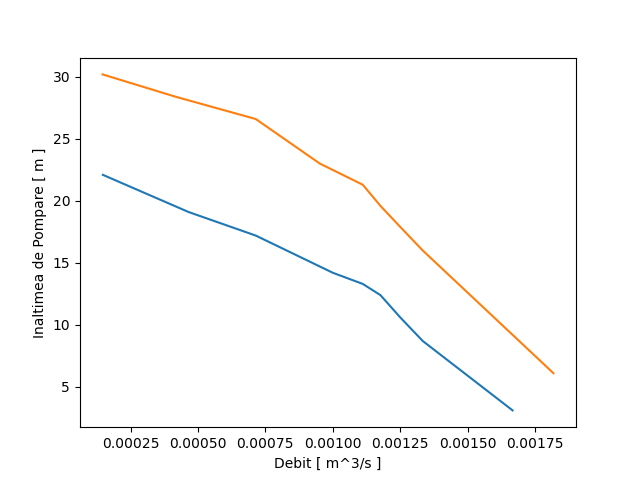

In [38]:
plt.plot(debitVolumic[0:9], inaltimeDePompare[0:9])
plt.plot(debitVolumic[9:19], inaltimeDePompare[9:19])
plt.xlabel('Debit [ m^3/s ]')
plt.ylabel('Inaltimea de Pompare [ m ]')
plt.show()